In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('Car_sales.csv')
data.head()
data[['Manufacturer', 'Model','Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor']].dropna()


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


In [34]:

k = data[data['Model']== 'SL']['Manufacturer']
k

129    Saturn
Name: Manufacturer, dtype: object

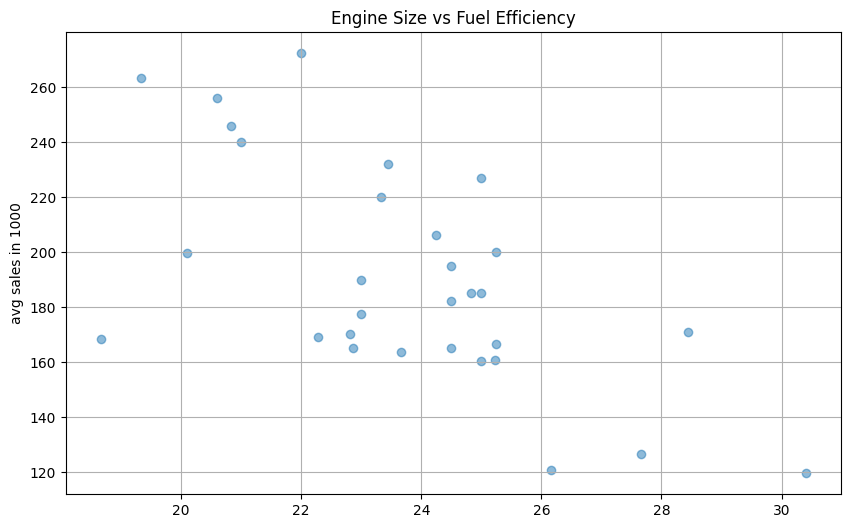

In [143]:
hpp = data.groupby('Manufacturer')[['Fuel_efficiency']].mean()
hpp1 = data.groupby('Manufacturer')[['Horsepower']].mean()

plt.figure(figsize=(10, 6))
plt.scatter(hpp, hpp1,alpha=0.5)
plt.title('Engine Size vs Fuel Efficiency')
#plt.xlabel('Engine Size (dL)')
plt.ylabel('avg sales in 1000')
plt.grid(True)

<Axes: ylabel='Manufacturer'>

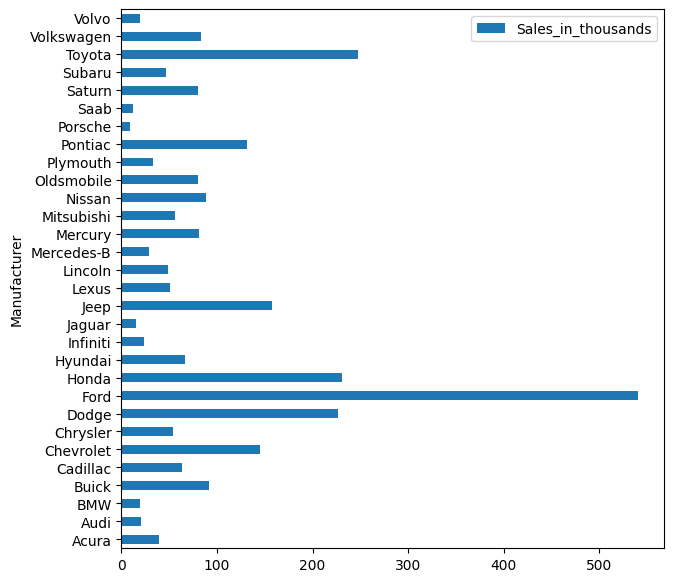

In [140]:
df_vehicle_type = data.groupby('Manufacturer')[['Sales_in_thousands']].max()
df_vehicle_type.plot.barh(figsize=(7, 7))

<Axes: ylabel='Manufacturer'>

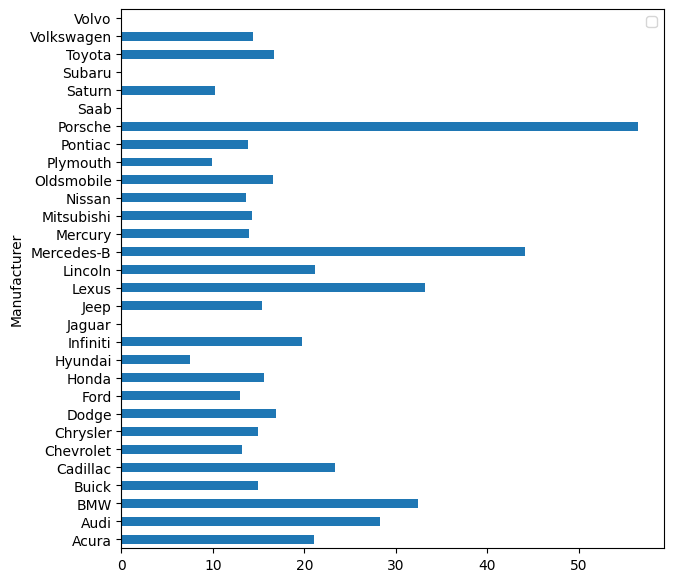

In [180]:
df = data.groupby('Manufacturer')[['__year_resale_value']].mean()
df.plot.barh(figsize=(7, 7))


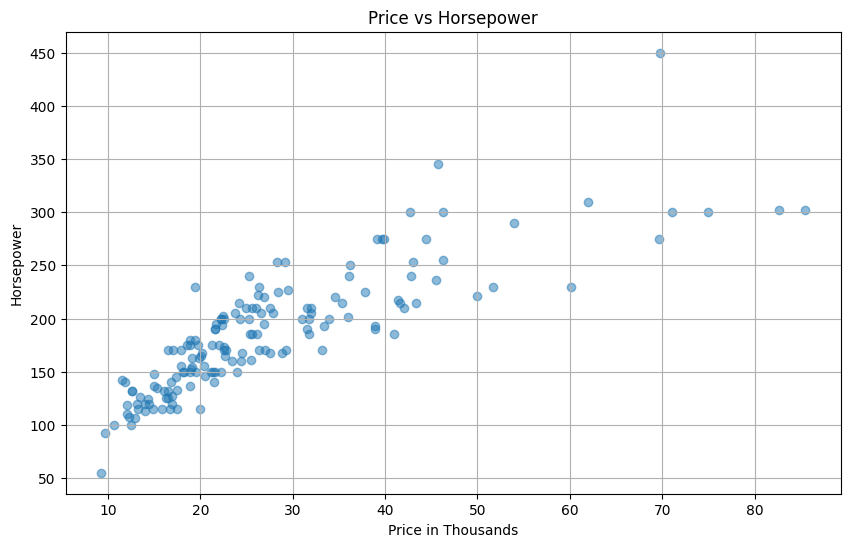

In [109]:
# Scatter plot for Price vs Horsepower
plt.figure(figsize=(10, 6))
plt.scatter(data['Price_in_thousands'], data['Horsepower'], alpha=0.5)
plt.title('Price vs Horsepower')
plt.xlabel('Price in Thousands')
plt.ylabel('Horsepower')
plt.grid(True)


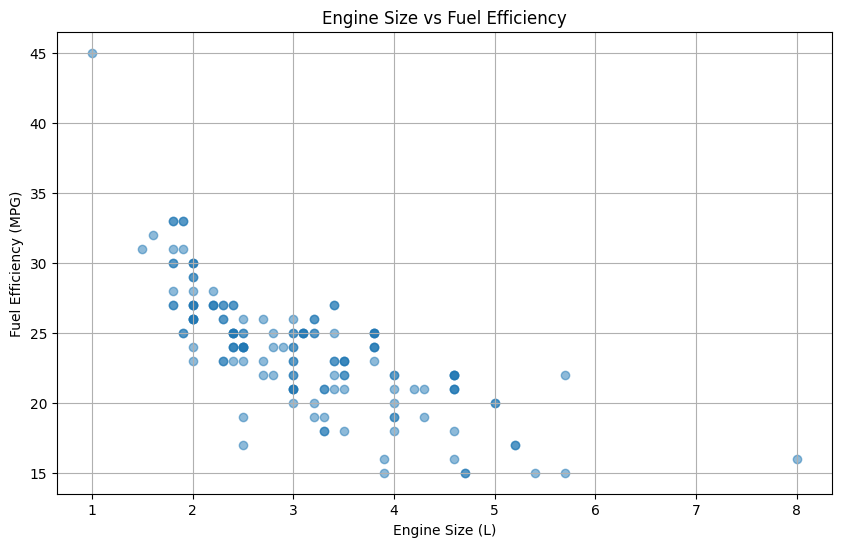

In [111]:
# Scatter plot for Engine Size vs Fuel Efficiency
plt.figure(figsize=(10, 6))
plt.scatter(data['Engine_size'], data['Fuel_efficiency'], alpha=0.5)
plt.title('Engine Size vs Fuel Efficiency')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Efficiency (MPG)')
plt.grid(True)

Text(0.5, 1.02, 'Pair Plot of Selected Variables')

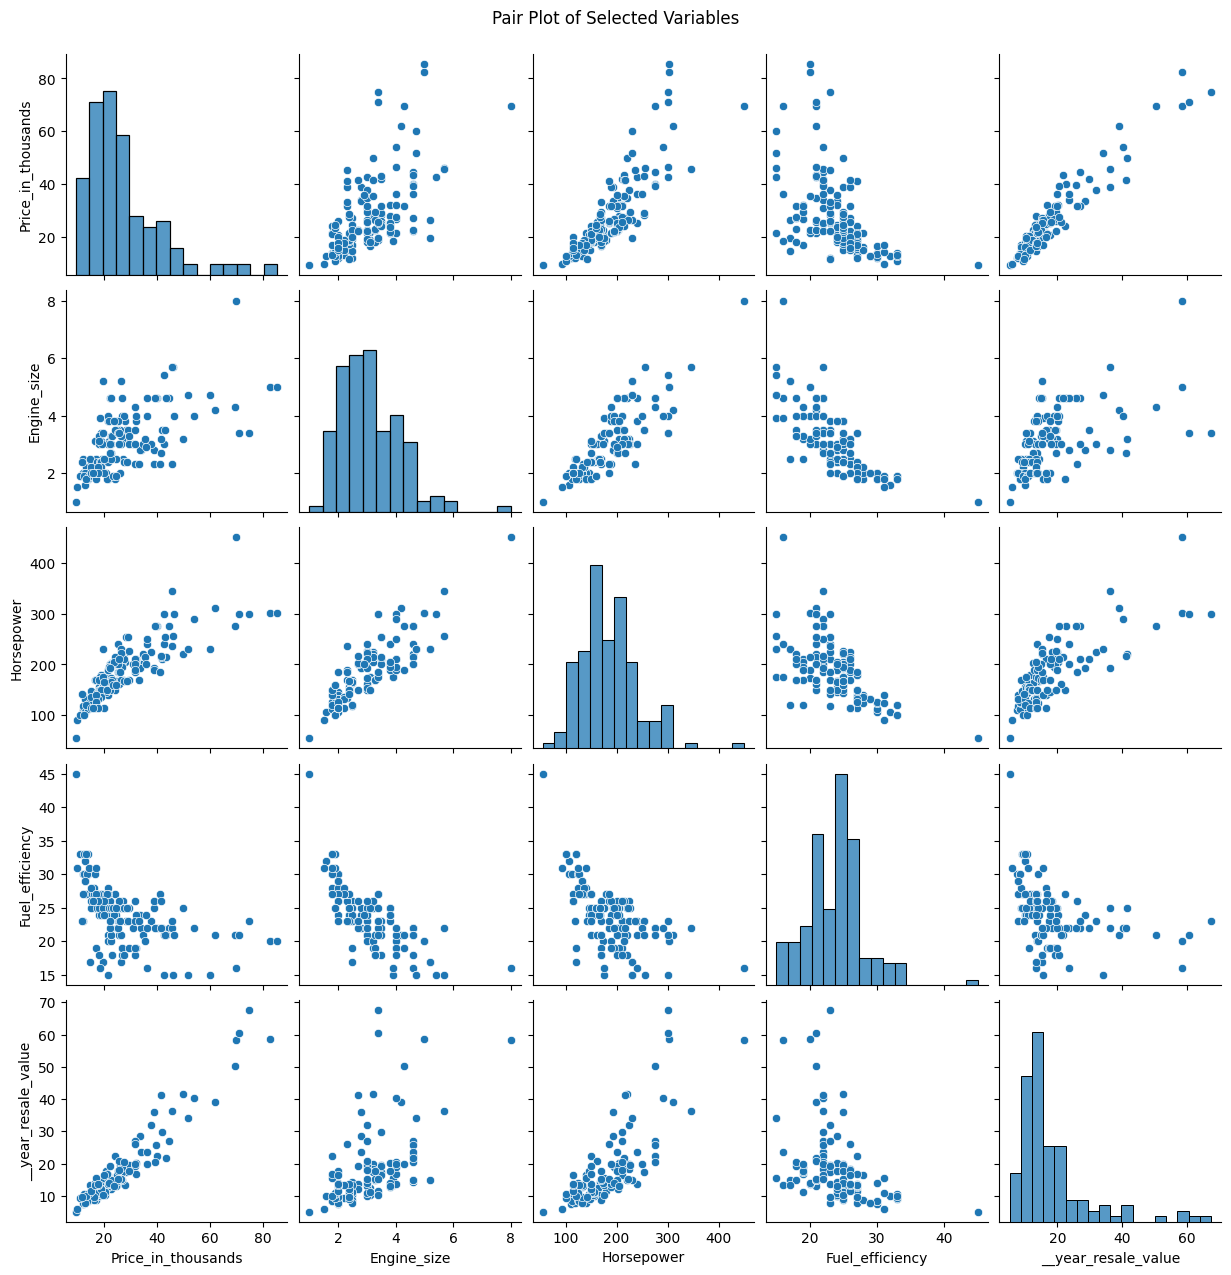

In [193]:
#Select relevant columns for the pair plot
import seaborn as sns
selected_columns = ['Price_in_thousands', 'Engine_size', 'Horsepower', 'Fuel_efficiency', '__year_resale_value']

# Create a pair plot
sns.pairplot(data[selected_columns])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)

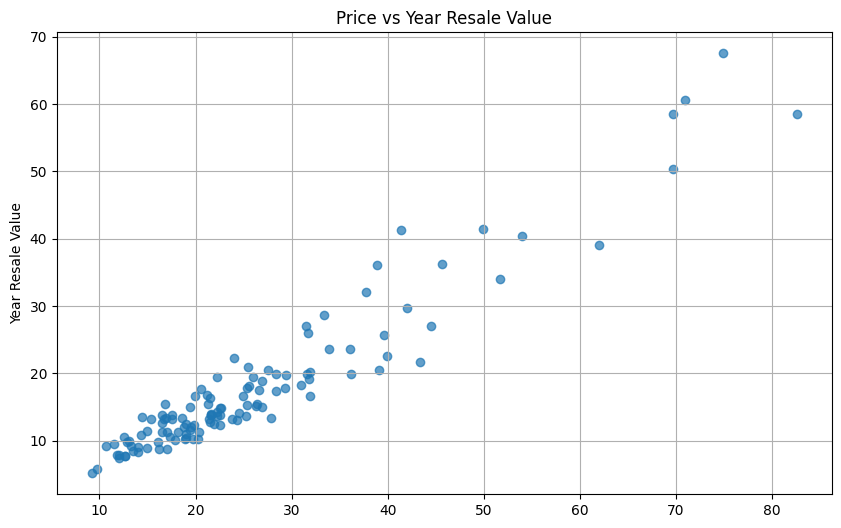

In [171]:
correlation = data['Price_in_thousands'].corr(data['__year_resale_value'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Price_in_thousands'], data['__year_resale_value'], alpha=0.7)
plt.title('Price vs Year Resale Value')
# plt.xlabel('Price in Thousands')
plt.ylabel('Year Resale Value')
plt.grid(True)

Text(0, 0.5, 'Model of a car')

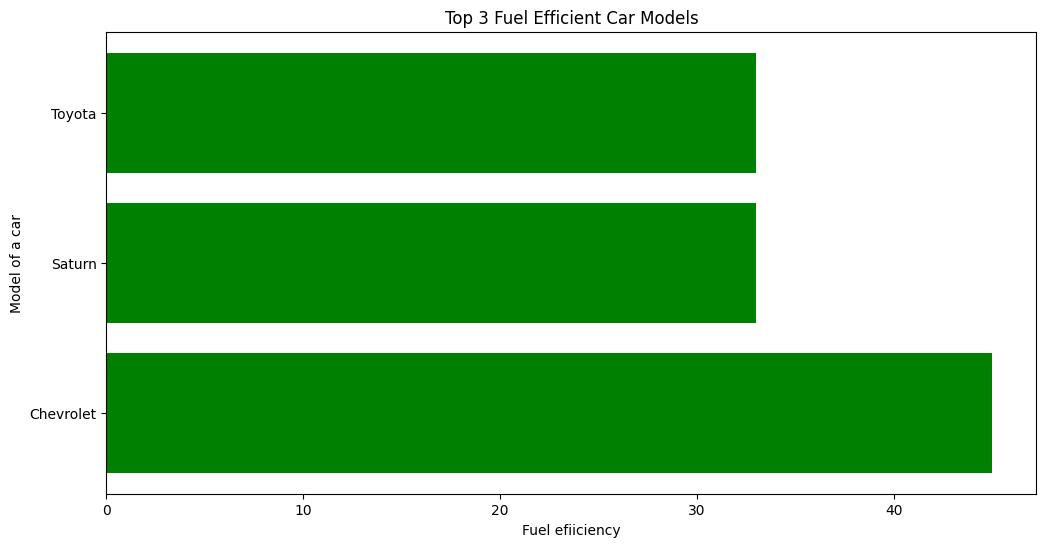

In [32]:
top_fuel_efficiency = data.nlargest(5, 'Fuel_efficiency')[['Manufacturer', 'Model', 'Fuel_efficiency']]
# Bar plot for top 5 fuel efficient models
plt.figure(figsize=(12, 6))
plt.barh(top_fuel_efficiency['Manufacturer'], top_fuel_efficiency['Fuel_efficiency'], color='green')

plt.xlabel('Fuel efiiciency')
plt.title('Top 3 Fuel Efficient Car Models')
plt.ylabel('Model of a car')

Text(0, 0.5, 'Model of a car')

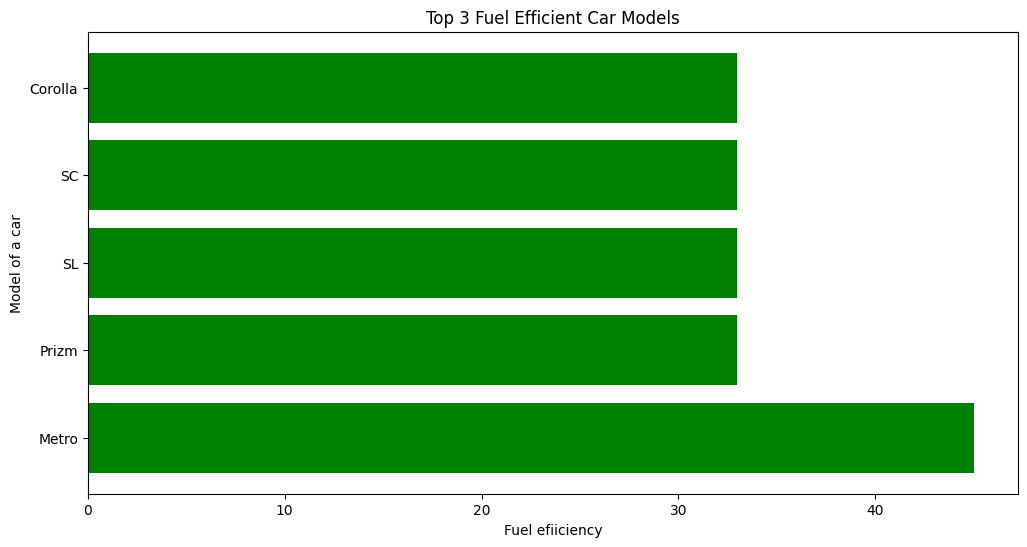

In [33]:
top_fuel_efficiency = data.nlargest(5, 'Fuel_efficiency')[['Manufacturer', 'Model', 'Fuel_efficiency']]
# Bar plot for top 5 fuel efficient models
plt.figure(figsize=(12, 6))
plt.barh(top_fuel_efficiency['Model'], top_fuel_efficiency['Fuel_efficiency'], color='green')

plt.xlabel('Fuel efiiciency')
plt.title('Top 3 Fuel Efficient Car Models')
plt.ylabel('Model of a car')